# California Housing Project 
## Name: Faizan Danish Bokhari

## Problem Framing & Big Picture:

***
### 1. Problem and Objective Overview:
This project aims to predict housing prices in California based on various factors such as location, demographic data, and economic conditions. The objective is to provide real estate analysts and investors with a tool that can accurately forecast housing prices (median_house_value) based on other input features. This prediction can assist stakeholders in making informed decisions related to property investments, real estate development, and urban planning.
***

### 2. Problem Framing:

**Supervised Learning:** This problem is framed as a supervised learning task, where the model is trained on historical housing data to predict future housing prices in California. The model learns relationships between features like location, housing characteristics, and median income to predict the target variable, median_house_value.

**Offline Learning:** The model is trained using a historical dataset, and once trained, it does not require real-time updates, making this an offline learning task.
***

### 3. Machine Learning Task:

**Regression Task:**

The task at hand is a regression problem, as we are predicting a continuous target variable (median housing price) based on several input features. Regression models are appropriate because the output is a numerical value representing the price of a property.

**Business Impact:**

Accurate housing price predictions can help investors, home buyers, and real estate agents make better decisions about buying, selling, or developing properties. Moreover, urban planners can use the predictions to assess the impact of demographic, economic, and environmental factors on property prices, leading to more informed policy and planning.
***

### 4. Performance Metrics:

To evaluate the performance of our regression models, we will use metrics like Root Mean Squared Error (RMSE) and R-squared (R²):

RMSE measures the average magnitude of prediction errors. A lower RMSE indicates better predictive accuracy, as it penalizes larger errors more heavily.
R² (R-squared) indicates the proportion of variance in the target variable (housing price) that is explained by the model. A higher R² value suggests that the model is better at explaining the variability in the data.
Together, these metrics will allow us to assess how well the model predicts housing prices and whether improvements can be made.
***
### 5. Additional Considerations:

Model Interpretability: Given the real-world impact of housing price predictions, it is crucial to ensure the model is interpretable. Providing clear explanations for the model's predictions (such as feature importance) can help real estate professionals and policymakers trust the model’s outcomes and make decisions based on the insights generated.
***

### 6. Conclusion:
This project has the potential to transform the way housing prices are predicted, helping various stakeholders make data-driven decisions that could optimize investments, policy-making, and resource allocation. By using machine learning to understand the factors driving housing prices in California, we can unlock valuable insights into real estate dynamics.

### Getting the Data
This dataset contains housing data from California, including various attributes such as geographical location, housing characteristics, and demographic information. It will be used for analysis, modeling, and other data-related tasks aimed at predicting housing prices and understanding the factors influencing the real estate market in California.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importing data
cali_housing = pd.read_csv('housing.csv')

In [3]:
cali_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Explore the data to gain insights


In [4]:
# Checking the size and type of data
cali_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* There DataFrame has 10 columns (attributed)
* The DataFrame has 20,640 rows (entries)
* total_bedrooms might have null values
* all attributes except ocean-proximity have numerical data


### List the available features and their data descriptions

Data Dictionary: The dataset used for model building contained 20640 observations of 10 variables. The data contains the following information:

| **Features** | **Data Description** | 
|:--------:|:--------:|
|longitude|	The longitude of the location of the house (numeric).|
|latitude|	The latitude of the location of the house (numeric).|
|housing_median_age|	The median age of the houses in the area (numeric).|
|total_rooms|	The total number of rooms in all houses in the area (numeric).|
|total_bedrooms|	The total number of bedrooms in all houses in the area (numeric).|
|population|	The population of the area (numeric).|
|households|	The number of households in the area (numeric).|
|median_income|	The median income of the households in the area (numeric).|
|median_house_value|	The median house value in the area (target variable for prediction, numeric).|
|ocean_proximity|	Categorical feature indicating proximity to the ocean (e.g., 'NEAR BAY', 'INLAND').|

In [5]:
# Checking for missing values
cali_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

This dataset has 207 missing values in the total_bedrooms column. 

In [6]:
# Replace missing values with Median 
cali_housing['total_bedrooms'].fillna(cali_housing['total_bedrooms'].median(), inplace=True)

In [7]:
# Checking for missing values again 
cali_housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
# Summary statistics for all numerical columns
cali_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


longitude: Longitude values range from -124.35 to -114.31, indicating the geographic location of the houses along the western coast of California.

latitude: Latitude values range from 32.54 to 41.95, covering a wide range of locations in California from southern to northern parts.

housing_median_age: The median age of houses ranges from 1 to 52 years, with an average around 28.64 years.
total_rooms: This represents the total number of rooms in a house. The number of rooms ranges from 2 to 39,320, with an average of 2,635 rooms per house.

total_bedrooms: This column reflects the number of bedrooms. The minimum value is 1, and the maximum value is 6,445, with an average of 537 bedrooms.

population: The population column shows the number of people in each block group, ranging from 3 to 35,682, with an average of 1,425 people.

households: This represents the number of households in each block group, ranging from 1 to 6,082, with an average of 500 households.

median_income: The median income in each block group ranges from 0.5 to 15 (presumably in units of 10,000 dollars), with an average value of 3.87 (roughly 38,700).

median_house_value: The median house value ranges from $14,999 to 500,001, with an average of 206,856.

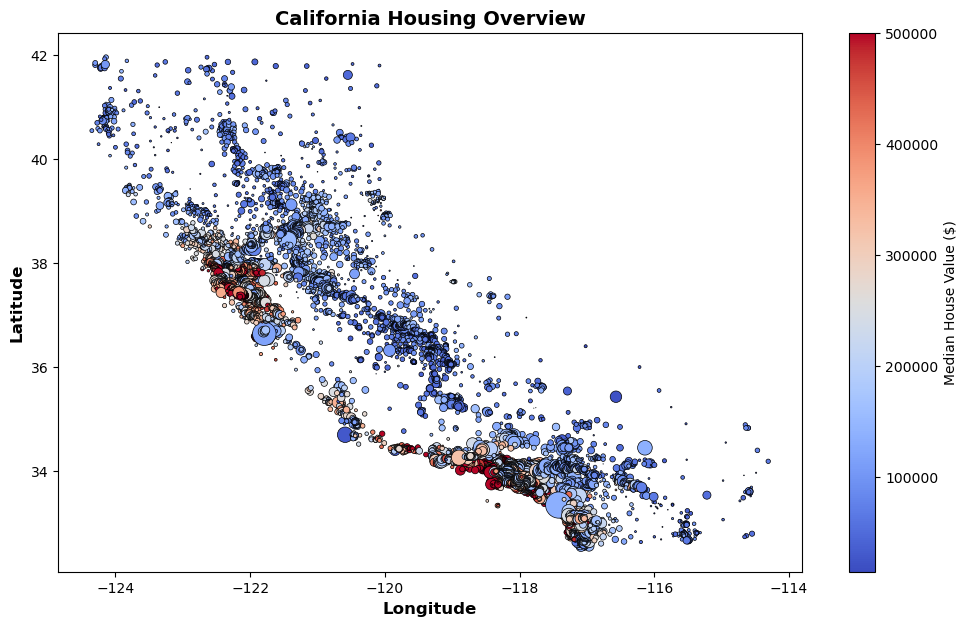

In [9]:
plt.figure(figsize=(12, 7))

plt.scatter(cali_housing['longitude'], cali_housing['latitude'],           
            s=cali_housing['population'] / 100,  
            c=cali_housing['median_house_value'], cmap='coolwarm', 
            edgecolors='k', linewidth=0.5)  

cbar = plt.colorbar()
cbar.set_label('Median House Value ($)')

plt.xlabel("Longitude", fontsize=12, fontweight='bold')
plt.ylabel("Latitude", fontsize=12, fontweight='bold')
plt.title("California Housing Overview", fontsize=14, fontweight='bold')


plt.show()

Features of the scatter plot:

Longitude: X-axis of the plot — represents the longitudinal coordinate of each location. Indicates coverage across the state of California.

Latitude: Y-axis of the plot — represents the latitudinal coordinate of each location. Indicates coverage across the state of California.

Population (scaled by 100): The size of each dot shows how many people live in that area. larger circles represent higher population. The biggest dots are located in certain areas, (e.g., near Los Angeles and San Francisco County), showing that those spots have a higher population.

Median House Value: The color of each dot represents the average price of homes in that area. Red dots show areas with expensive homes,(e.g., near Los Angeles and San Francisco County), while blue dots represent areas where homes are more affordable.

cmap='coolwarm': The color scale goes from blue for lower house prices to red for higher house prices. This helps us quickly spot areas with high or low home values.

Edgecolors='k': Each dot has a black outline, making it easier to see the dots and distinguish them from each other.

linewidth=0.5: The black outline around the dots is thin, which helps prevent clutter on the plot.


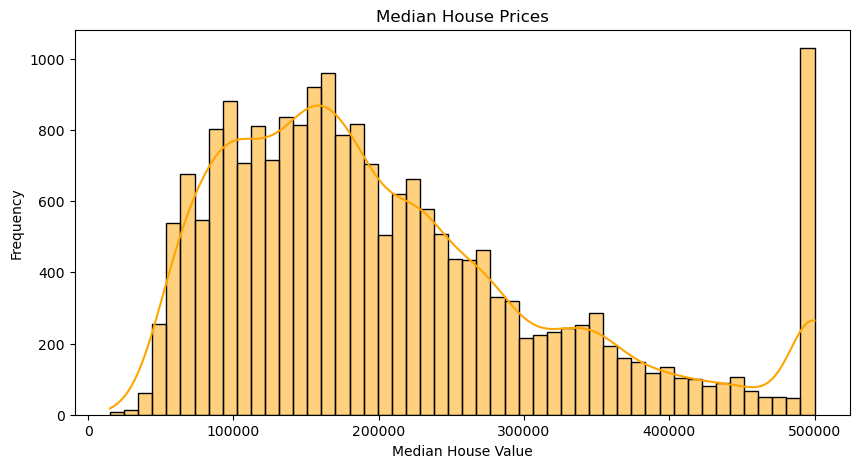

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(cali_housing['median_house_value'], bins=50, kde=True, color='orange')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Median House Prices')
plt.show()

The results show that:

Most houses in California are priced between 150,000 and 180,000, with the highest number of houses falling in this range.

There are very few houses with prices below 25,000.

Fewer houses are priced above 350,000, but some homes approach the 500,000 mark.

The price range from 490,300.96 to 500,001, with 1,030 houses in it, could be an indication of either:

A Maximum Value Cap: This could be a cap set in the data collection process, meaning that houses priced higher than 500,001. This would explain why so many houses fall into this range.

Outliers: If there is no data cap, this range could represent an outlier cluster, where houses close to this price point are disproportionately abundant, but this is less likely given the number of entries.


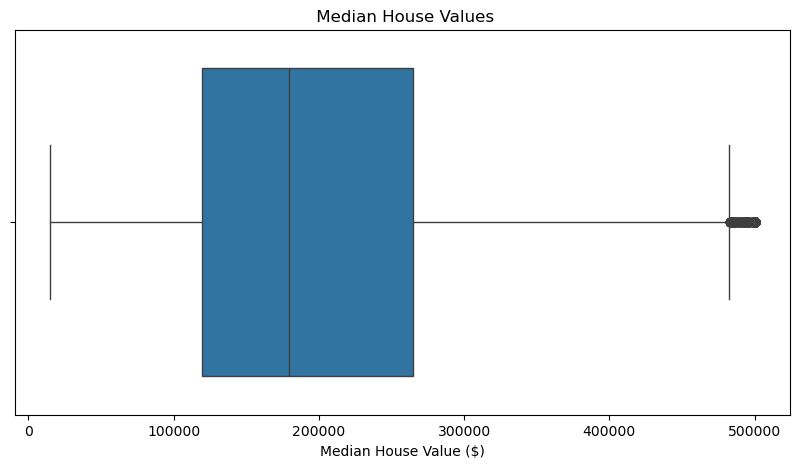

In [11]:
plt.figure(figsize=(10, 5))

# Boxplot to detect outliers
sns.boxplot(x=cali_housing["median_house_value"])

plt.title(" Median House Values")
plt.xlabel("Median House Value ($)")
plt.show()

The maximum value of 500,001 suggests that there is a cap or threshold in the dataset for house prices. Interestingly, we see a cluster of houses around this value, with a significant number of houses having values exactly at 500,001. This could indicate a data ceiling or a max value. 

In [12]:
# Number of houses at the max value
max_value = (cali_housing["median_house_value"] == 500001).sum()
print(max_value)

965


Number of houses priced at 500,001: 965

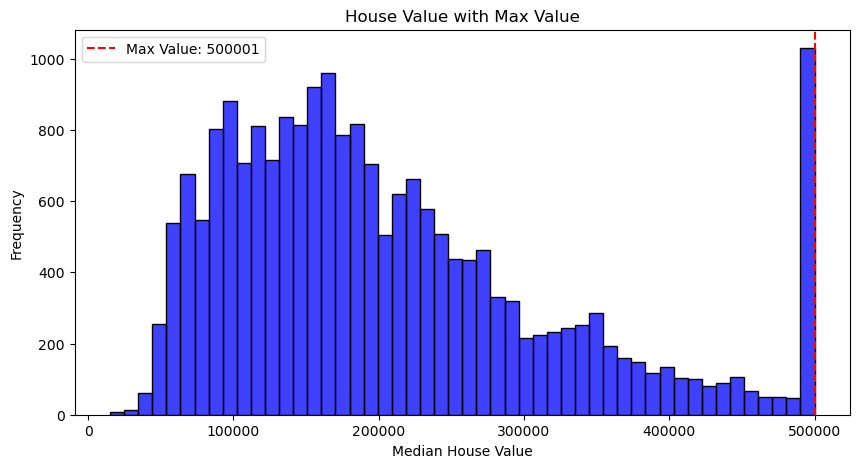

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(cali_housing['median_house_value'], bins=50, kde=False, color='blue')
plt.axvline(500001, color='red', linestyle='--', label='Max Value: 500001')
plt.legend()
plt.title('House Value with Max Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [14]:
cali_housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

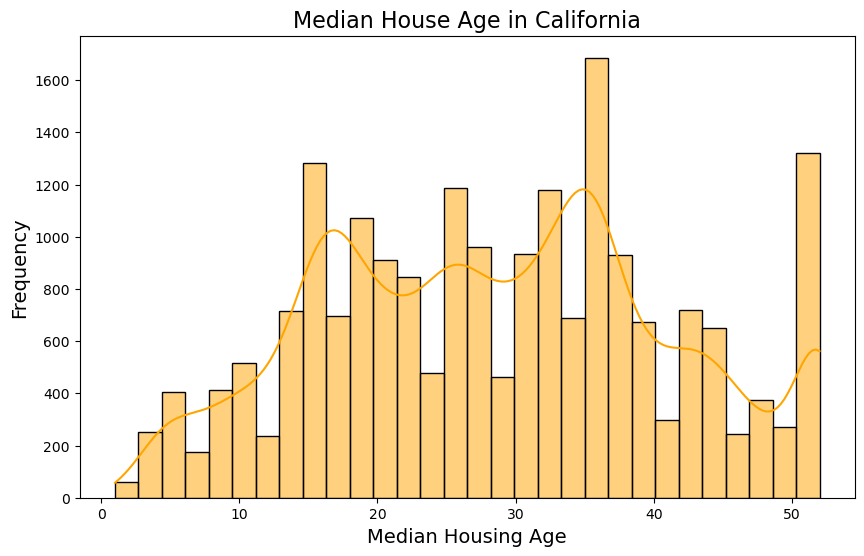

In [15]:
plt.figure(figsize=(10, 6))

sns.histplot(cali_housing["housing_median_age"], kde=True, color='orange', bins=30)

plt.title("Median House Age in California", fontsize=16)
plt.xlabel("Median Housing Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

Older Homes: There are fewer homes with median ages greater than 40 years.

Newer Homes: Similarly, houses that are less than 10 years old are also relatively few in number.

Overall Trend: A large number of properties have a median housing age between 9.5 and 36.7 years, with the highest frequency around 35 to 36.7 years.

<Axes: xlabel='median_house_value', ylabel='median_income'>

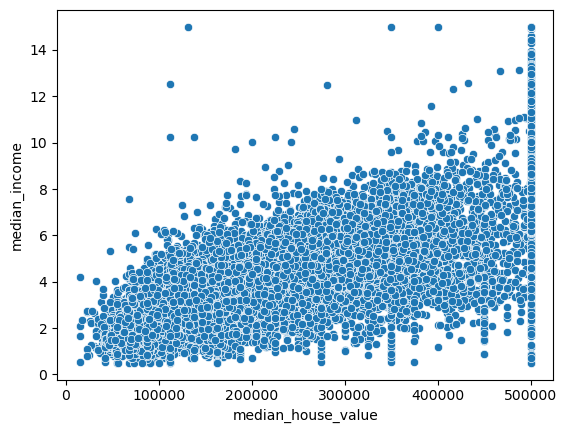

In [16]:
sns.scatterplot(x="median_house_value",y="median_income",data=cali_housing)

Key Insights:

Positive Skew in House Prices: Since the max (500,001) is much higher than the mean and median, it’s likely a few very expensive areas are pulling the average up.

Strong Variability: Both house values and income show a broad range — suggesting California has a wide economic disparity across different regions.

Possible Outliers: The cap at 500,001 for house values and 15.0001 for income might indicate that some values were artificially limited.


### Identifying the target or label attribute

In this dataset, the target or label attribute is:

median_house_value

This is the variable that we are trying to predict using the other features in the dataset, such as longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, and ocean_proximity.

### Split data into a training and test set

We are using the train_test_split function from scikit-learn to split the California housing dataset into training and testing sets. 80% of the data being used for training (train_set) and 20% for testing (test_set). The random_state = 42 parameter ensures that the split is reproducible.

In [17]:
from sklearn.model_selection import train_test_split

selected_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                     'population', 'households', 'median_income', 'ocean_proximity']

# Separating target variable (y) and features (X)
X = cali_housing[selected_features]
y = cali_housing['median_house_value']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Looking at the training set data
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [19]:
# Looking at the testing set data
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND


In [20]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


1. Longitude:
The longitude values range from -124.35 to -114.31, with a mean of approximately -119.58 and a standard deviation of about 2.01. This indicates that the housing data spans various locations in California, with a slight concentration in the western part of the state.

2. Latitude:
The latitude values range from 32.55 to 41.95, with a mean of around 35.64 and a standard deviation of 2.14. This suggests that the data represents various regions in California, mostly in the central and southern parts.

3. Housing Median Age:
The median age of houses in this dataset ranges from 1 to 52 years, with a mean of 28.61 and a standard deviation of 12.60. This implies that most of the houses are relatively newer, with a significant portion built within the last few decades.

4. Total Rooms:
The total number of rooms in houses ranges from 2 to 39,320, with a mean of 2,642 and a standard deviation of 2,174. This shows a large variation in house sizes, with some very large properties and many smaller homes.

5. Total Bedrooms:
The total number of bedrooms ranges from 1 to 6,445, with a mean of 538 and a standard deviation of 419. Like the total rooms variable, this shows considerable variation in house sizes, with some homes having many bedrooms.

6. Population:
The population in each area ranges from 3 to 35,682, with a mean of 1,426 and a standard deviation of 1,137. This indicates a wide range of population densities, from sparsely populated areas to highly populated urban locations.

7. Households:
The number of households ranges from 1 to 6,082, with a mean of 500 and a standard deviation of 381. This shows that most of the regions have moderate numbers of households, with some very large communities.

8. Median Income:
The median income values range from 0.50 to 15.00 per hour, with a mean of approximately 3.88 and a standard deviation of 1.90. The distribution indicates that most areas have moderate incomes, but there are some areas with very high or very low incomes.

9. Median House Value:
The median house value ranges from 15,000 to 500,001, with a mean of 207,195 and a standard deviation of 115,623. This wide range suggests a large disparity in housing prices across different regions in California, with more expensive properties concentrated in certain areas.

10. Ocean Proximity:
This variable indicates the proximity of the house to the ocean, with categories like 'NEAR BAY', 'NEAR OCEAN', 'ISLAND', 'INLAND', and 'NO OCEAN'. It is a categorical feature that is used to assess the impact of the ocean's proximity on housing prices.

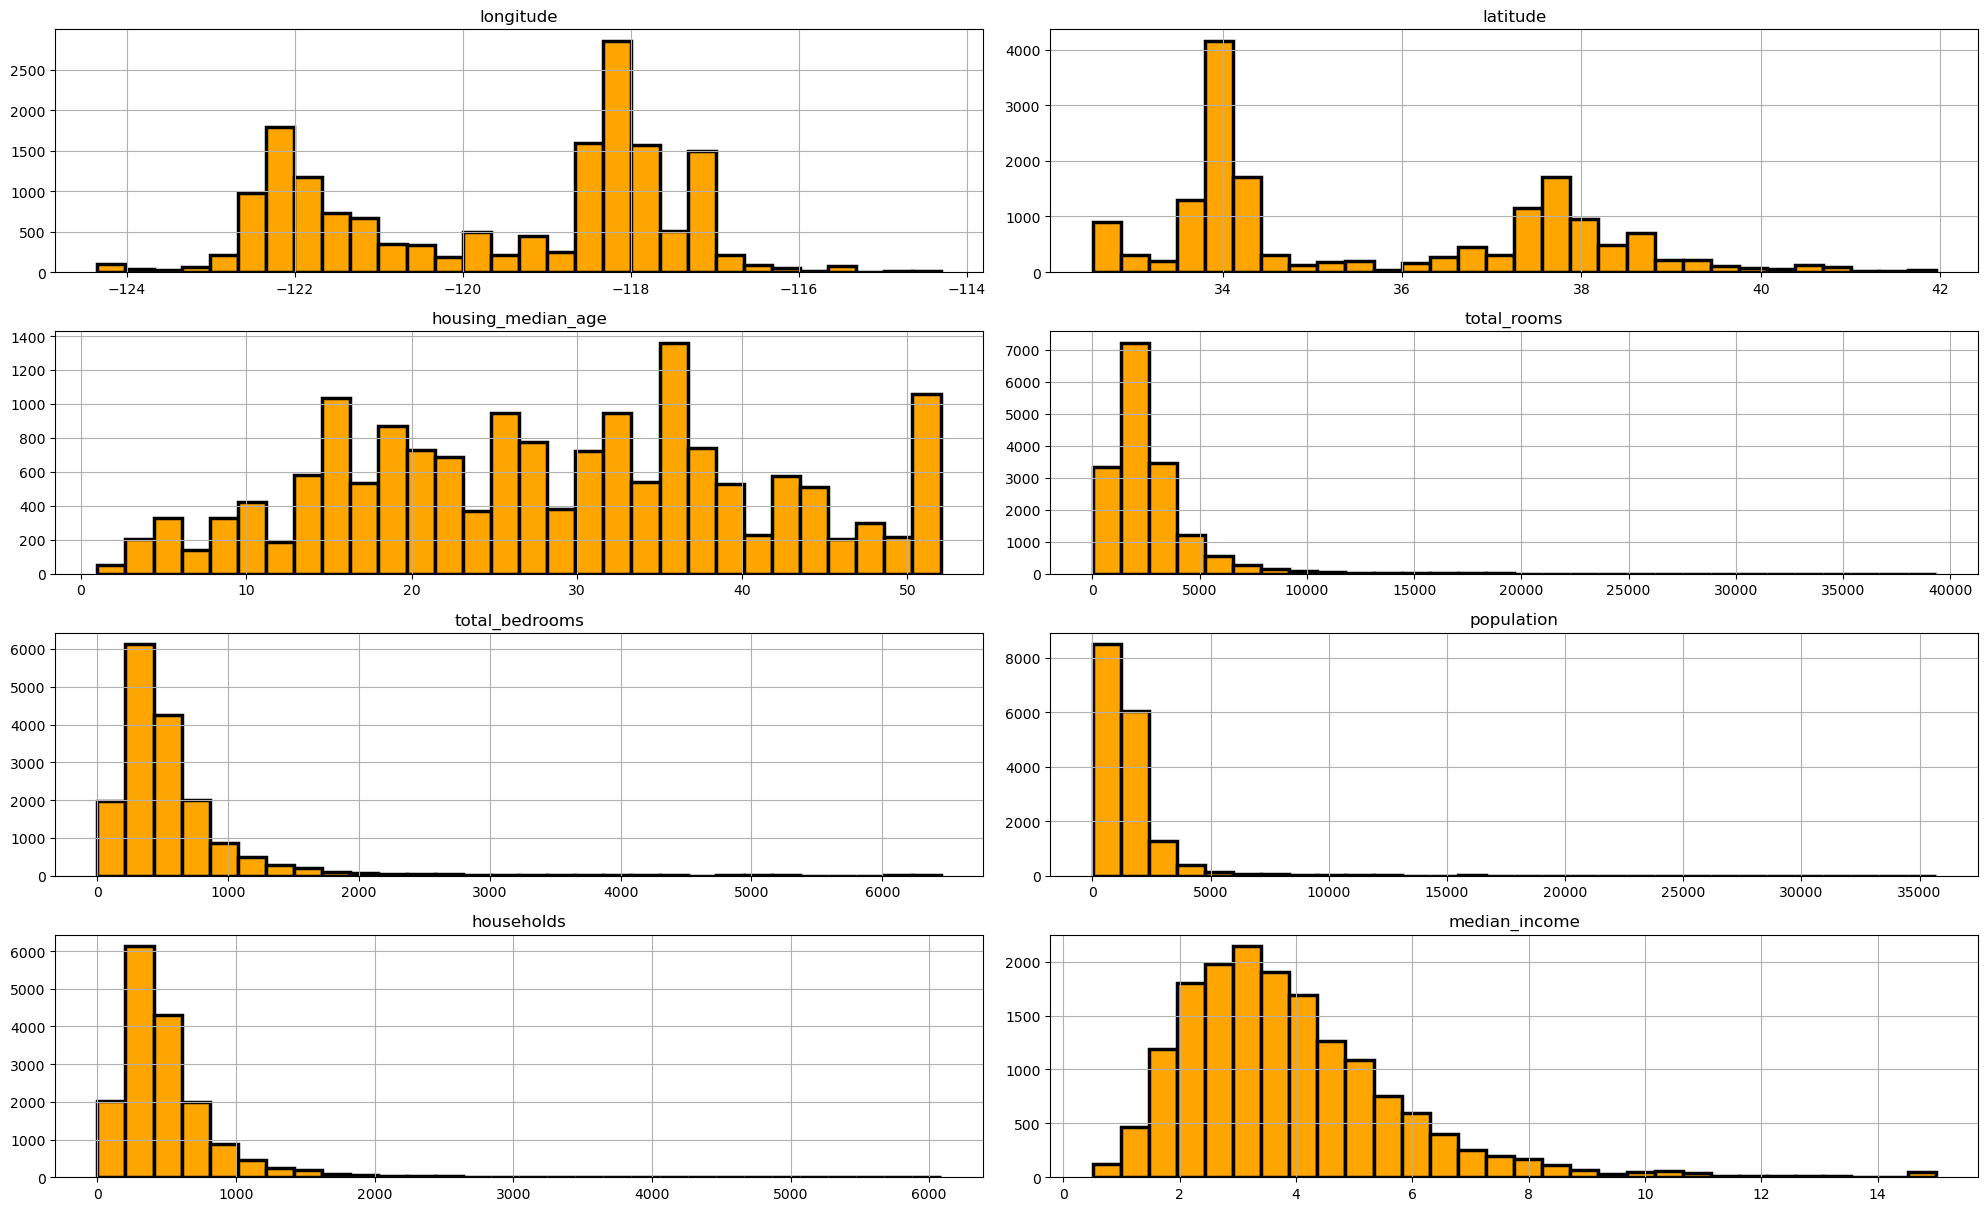

In [21]:
# histograms 
X_train.hist(
    bins=30, figsize=(20, 15), color='orange',  
    edgecolor='black', linewidth=2.5, layout=(5, 2)  
)

plt.tight_layout()
plt.show()


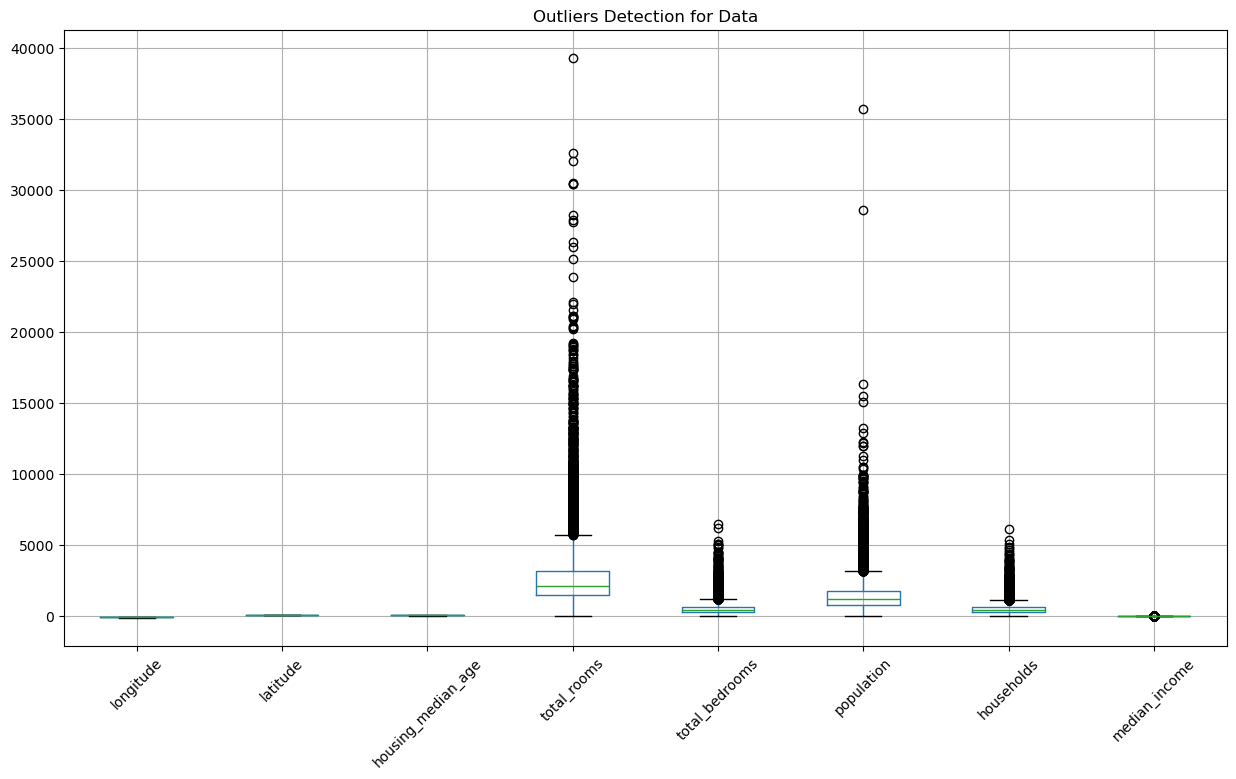

In [22]:
numerical_cols = X_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 8))
X_train[numerical_cols].boxplot(rot=45)  
plt.title("Outliers Detection for Data")
plt.show()

In [23]:
numerical_cols = X_train.select_dtypes(include=['number'])

# correlation matrix
corr_matrix = numerical_cols.corr()

print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924485           -0.101818     0.038676   
latitude            -0.924485  1.000000            0.005296    -0.029224   
housing_median_age  -0.101818  0.005296            1.000000    -0.360922   
total_rooms          0.038676 -0.029224           -0.360922     1.000000   
total_bedrooms       0.063064 -0.059998           -0.320624     0.930489   
population           0.094276 -0.102499           -0.292283     0.857936   
households           0.049306 -0.064061           -0.302796     0.920482   
median_income       -0.017040 -0.076571           -0.121711     0.198268   

                    total_bedrooms  population  households  median_income  
longitude                 0.063064    0.094276    0.049306      -0.017040  
latitude                 -0.059998   -0.102499   -0.064061      -0.076571  
housing_median_age       -0.320624   -0.292283   -0.302796      -0.121711  
total_rooms

longitude and latitude:
Correlation: -0.92
Very strong negative correlation
Suggests that as you move east, you tend to go south in California — consistent with the state’s layout.

median_income and total_rooms:
Correlation: 0.20
Weak positive correlation
Slight trend: higher income areas may have slightly larger houses.

median_income and housing_median_age:
Correlation: -0.12
Weak negative correlation
Richer neighborhoods may have slightly newer homes.

median_income and latitude:
Correlation: -0.08
Weak negative correlation
Slight tendency for higher income in southern California.

total_rooms and total_bedrooms:
Correlation: 0.93
Strong positive correlation
More rooms typically means more bedrooms.

total_rooms and households:
Correlation: 0.92
Strong positive correlation
More rooms often indicate more households.

total_bedrooms and households:
Correlation: 0.98
Extremely strong correlation
More bedrooms often indicate more households.

population and total_rooms:
Correlation: 0.86
High positive correlation
Larger housing correlates with more people.

population and households:
Correlation: 0.91
Strong positive correlation
More people mean more households.

housing_median_age and total_rooms:
Correlation: -0.36
Moderate negative correlation
Older areas tend to have fewer rooms.

housing_median_age and population:
Correlation: -0.29
Moderate negative correlation
Older areas are somewhat less populated.

housing_median_age and households:
Correlation: -0.30
Moderate negative correlation
Older buildings = fewer households.


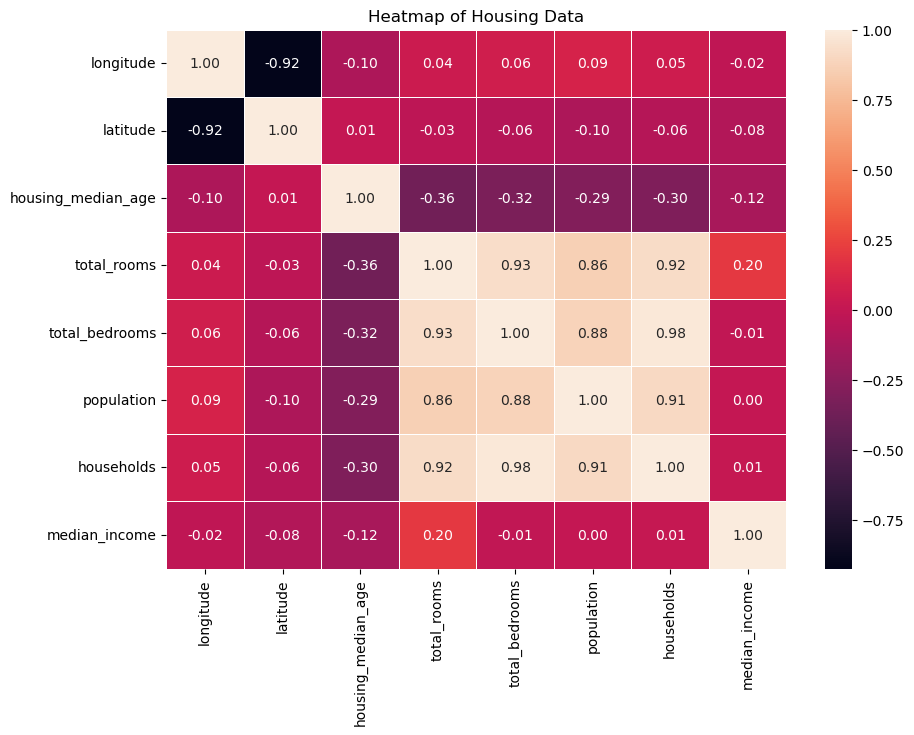

In [24]:
# heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Housing Data")
plt.show()

## Data Preprocessing with Pipelines

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define numeric and categorical features
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']
categorical_features = ['ocean_proximity']

# Pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess data
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform training data
X_transformed = full_pipeline.fit_transform(X_train)

# Output the shape
print("Transformed training set shape:", X_transformed.shape)


Transformed training set shape: (16512, 13)


A data preprocessing pipeline was constructed for the machine learning model, specifying numeric and categorical features.

A custom transformer was implemented to sum absence columns and potentially drop specific columns.

Separate pipelines were defined for numeric and categorical features, integrating imputation for missing values and scaling/encoding.

The ColumnTransformer was utilized to apply these pipelines.

Subsequently, the training data was fitted and transformed using these pipelines, and the shape of the transformed datasets was 

16,512 rows:

This represents the number of data points or samples in the training set. Each row corresponds to an individual observation (rows).

13 columns:

After preprocessing, the dataset now has 13 features or columns. This increase is due to the transformations applied to the data. The categorical feature 'ocean_proximity' was transformed through one-hot encoding, which created 5 new binary columns, such as:
'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', etc.
This transformation increased the number of columns from the original 9 to 13.

## Exploring different models and shortlisting the best ones

In [26]:
# Importing libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

Three models were defined: Linear Regression, Decision Tree Regressor, and Random Forest Regressor, which will be used to predict house prices based on the input features.

In [27]:
# Comparing each model using cross-validation
for model in models:
    name = model.__class__.__name__
    r2_scores = cross_val_score(model, X_transformed, y_train, 
                                scoring='r2', cv=5)
    rmse_scores = cross_val_score(model, X_transformed, y_train,
                                  scoring='neg_root_mean_squared_error', cv=5)

    print(f"{name}")
    print(f"Mean R² Score: {np.mean(r2_scores):.3f}")
    print(f"Mean RMSE: {abs(np.mean(rmse_scores)):.2f}")

LinearRegression
Mean R² Score: 0.648
Mean RMSE: 68622.65
DecisionTreeRegressor
Mean R² Score: 0.642
Mean RMSE: 69351.66
RandomForestRegressor
Mean R² Score: 0.819
Mean RMSE: 49236.48


1. Linear Regression:

Mean R² Score: 0.648
The R² score indicates how well the model fits the data. A value of 0.648 suggests that Linear Regression explains about 64.8% of the variance in the target variable (y). It shows a moderate fit but leaves room for improvement.

Mean RMSE: 68622.65
The RMSE (Root Mean Squared Error) is a measure of the model's error in terms of the actual units of the target variable. A value of 68,622.65 means that, on average, the model's predictions are off by about 68,622.65 units.

2. Decision Tree Regressor:
Mean R² Score: 0.637
The R² score is similar to Linear Regression, at 0.637. It indicates a slightly lower ability to explain the variance compared to Linear Regression. A decision tree can overfit on the data, which might explain the lower score.

Mean RMSE: 68974.53
The RMSE value of 68,974.53 is higher than that of Linear Regression, suggesting that the Decision Tree model's predictions are less accurate on average.

3. Random Forest Regressor:
Mean R² Score: 0.818
The Random Forest Regressor has the highest R² score of 0.818, meaning it explains about 81.8% of the variance in the target variable. This is a much better fit compared to both Linear Regression and Decision Tree.

Mean RMSE: 49209.93
The RMSE of 49,209.93 is the lowest among all models, indicating that the Random Forest model's predictions are closer to the true values on average compared to the other models.

Summary of Results:
The Random Forest Regressor performs the best in terms of both R² score (highest fit) and RMSE (lowest error), suggesting that it is the most accurate model among the three.


## Fine-Tune the System

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

Setting up a grid of hyperparameters for tuning Random Forest model. The grid search will explore different combinations of these hyperparameters to find the best set for our model.

## Pick one model 

In [29]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)


In [30]:
# Initialize GridSearchCV
grid_search = GridSearchCV(rf, param_grid, scoring='r2', cv=5, n_jobs=-1)

In [31]:
# Perform the grid search
grid_search.fit(X_transformed, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [32]:
# Output the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best R² score: 0.8191581354538385


The best hyperparameters found by the grid search are:

'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150

The best R² score of 0.819 indicates that this configuration explains 81.9% of the variance in the target variable, suggesting that this set of hyperparameters leads to the most accurate model on the training data.

## Fine-tune your models

## Transforming testing data using data preparation pipeline

In [33]:
# Transform the testing data using the preprocessor pipeline
X_test_transformed = full_pipeline.transform(X_test)

# Output the shape of the transformed testing set
print("Transformed testing set shape:", X_test_transformed.shape)


Transformed testing set shape: (4128, 13)


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Transform the test set
X_test_transformed = full_pipeline.transform(X_test)

# Initialize the model with best hyperparameters
best_rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2
)

# Fit the model on the training data
best_rf_model.fit(X_transformed, y_train)

# Predict on the test data
y_pred = best_rf_model.predict(X_test_transformed)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score on test set: {r2:.3f}")
print(f"RMSE on test set: {rmse:.2f}")


R² Score on test set: 0.820
RMSE on test set: 48528.87


## Present Your Solution

The final model's R2 score is 0.819. This means that approximately 82% of the variance in the grades can be explained by the model. Higher R2 scores indicate that the model is better at predicting house values.

The final model's Root Mean Squared Error (RMSE) means, on average, the model's predictions are off by about $48.7K from the actual values. Lower RMSE values indicate that the model is making more accurate predictions.

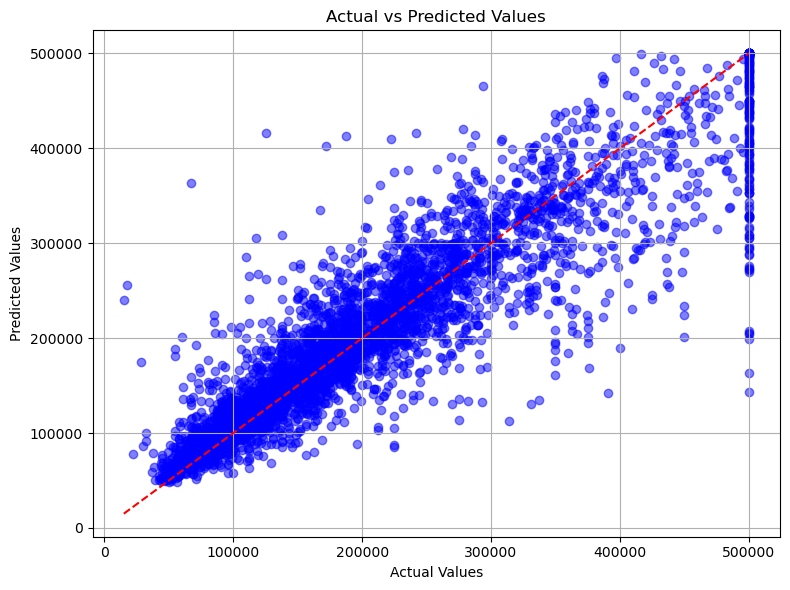

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


## Concluding Section

Based on the comparison of the models, the Random Forest Regressor emerged as the best solution, with the lowest RMSE and the highest R² score, indicating it provides the most accurate and reliable predictions. It explains the highest proportion of variance (82%), making it the most suitable model for the given task.

In contrast, the Linear Regression model proved to be the least effective, with the highest RMSE and the lowest R² score, highlighting its limitations in handling the data and capturing relationships between the features and the target variable. The Decision Tree Regressor provided a middle ground, outperforming Linear Regression but still underperforming compared to Random Forest.

In conclusion, the Random Forest Regressor should be chosen for further model development and deployment due to its superior performance in accuracy and explanatory power.